In [217]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor as DR
from sklearn.neighbors import KNeighborsRegressor as KNR

In [218]:
seed = 97404

In [219]:
df = pd.read_csv("Final Data.csv", index_col="Unnamed: 0")

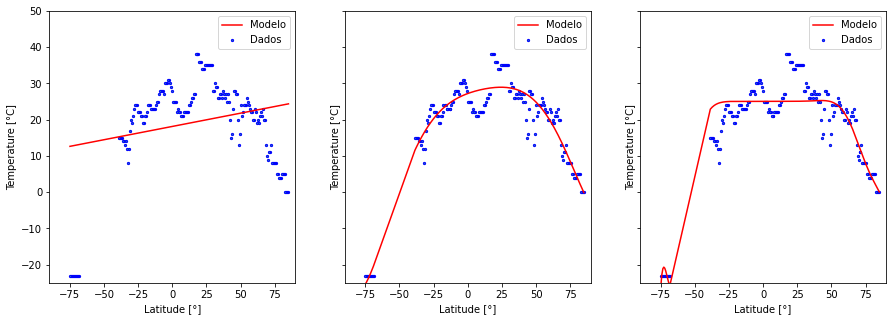

In [220]:
np.random.seed(0)

COMPLEXIDADE_DOS_MODELOS = [1, 6, 15]

fig, axes = plt.subplots(
    ncols=len(COMPLEXIDADE_DOS_MODELOS),
    nrows=1,
    figsize=(len(COMPLEXIDADE_DOS_MODELOS) * 5, 5),
    sharey=True,
)

for i in range(len(COMPLEXIDADE_DOS_MODELOS)):

    eixo = axes[i]

    # Este bloco cria o pipeline do modelo que será ajustado
    polynomial_features = PolynomialFeatures(
        degree=COMPLEXIDADE_DOS_MODELOS[i], include_bias=False
    )
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("features_polinomiais", polynomial_features),
            ("regressao_linear", linear_regression),
        ]
    )
    pipeline.fit(df["latitude"].values[:, np.newaxis], df["temperature"].values)

    # Plotando!
    eixo.plot(
        df["latitude"],
        pipeline.predict(df["latitude"].values[:, np.newaxis]),
        label="Modelo",
        color="r",
    )
    eixo.scatter(df["latitude"].values, df["temperature"].values, edgecolor="b", s=5, label="Dados")

    # Configurando o plot
    eixo.set_xlabel("Latitude [°]")
    eixo.set_ylabel("Temperature [°C]")
    eixo.set_xlim((-90, 90))
    eixo.set_ylim((-25, 50))
    eixo.legend()

plt.show()

In [221]:
df = df.convert_dtypes()

In [222]:
df

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility,is_day,temperature,weather_descriptions,feelslike
7,84.94,14,163,1022,0.0,80,5,1,10,False,0,['Clear'],-4
8,84.22,14,163,1022,0.0,80,5,1,10,False,0,['Clear'],-4
9,83.49,14,163,1022,0.0,80,5,1,10,False,0,['Clear'],-4
10,82.77,14,163,1022,0.0,80,5,1,10,False,0,['Clear'],-4
11,82.05,28,109,1013,0.0,80,37,1,10,False,5,['Partly cloudy'],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,-71.9,30,121,1002,0.0,60,46,1,10,False,-23,['Partly cloudy'],-36
225,-72.6,30,121,1002,0.0,60,46,1,10,False,-23,['Partly cloudy'],-36
226,-73.3,30,121,1002,0.0,60,46,1,10,False,-23,['Partly cloudy'],-36
227,-74.1,30,121,1002,0.0,60,46,1,10,False,-23,['Partly cloudy'],-36


In [223]:
def remove_not_numbers(df):
    df_c = df.copy()
    for i in df_c.columns:
        if is_numeric_dtype(df_c[i]) == False or str(df_c[i].dtype) == 'boolean':
            #print(i, "removido")
            df_c = df_c.drop([i], axis=1)
        else:
            continue
    return df_c

In [224]:
test_size = 0.2
SEMENTE_ALEATORIA = seed
FEATURES = ["latitude", "wind_speed", "wind_degree", "pressure", "precip", "humidity", "cloudcover", "uv_index", "visibility"]
TARGET = ["temperature", "feelslike"]

df_num = remove_not_numbers(df)

indices = df_num.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=test_size, random_state=SEMENTE_ALEATORIA
)

df_treino = df_num.loc[indices_treino]
df_teste = df_num.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values
X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values

In [225]:
# cria o modelo
modelo_baseline = DummyRegressor()

# treina o modelo
modelo_baseline.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_baseline.predict(X_teste)

In [226]:
y_verdadeiro = y_teste
y_previsao = modelo_baseline.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo baseline foi de {RMSE}.")

O RMSE do modelo baseline foi de 16.475517267941274.


In [227]:
df_num

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility,temperature,feelslike
7,84.94,14,163,1022,0.0,80,5,1,10,0,-4
8,84.22,14,163,1022,0.0,80,5,1,10,0,-4
9,83.49,14,163,1022,0.0,80,5,1,10,0,-4
10,82.77,14,163,1022,0.0,80,5,1,10,0,-4
11,82.05,28,109,1013,0.0,80,37,1,10,5,1
...,...,...,...,...,...,...,...,...,...,...,...
224,-71.9,30,121,1002,0.0,60,46,1,10,-23,-36
225,-72.6,30,121,1002,0.0,60,46,1,10,-23,-36
226,-73.3,30,121,1002,0.0,60,46,1,10,-23,-36
227,-74.1,30,121,1002,0.0,60,46,1,10,-23,-36


In [228]:
# cria o modelo
modelo_linear = LinearRegression()

# treina o modelo
modelo_linear.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_linear.predict(X_teste)
print(previsao)

[[ 20.59247304  20.64173266]
 [ 19.95622531  18.51310471]
 [ 18.13748559  17.64988382]
 [ 28.9741433   29.33304496]
 [ 22.6064601   24.41296281]
 [ 26.82314607  27.66342128]
 [ 23.09434745  21.30102605]
 [ 13.34392318  12.54435142]
 [ 38.15618576  38.50338344]
 [ 23.06411099  21.26834221]
 [ 23.13723655  21.93875321]
 [  0.55404336  -6.49964403]
 [ 22.44013819  20.51740098]
 [ 23.45455605  23.02313385]
 [ 21.14022976  22.6169237 ]
 [ 27.21481748  28.49236942]
 [  6.69764529   3.47138436]
 [ 15.53255533  14.51089074]
 [  6.0192049    2.40983212]
 [ 23.96361715  22.80630698]
 [ -3.74617247 -12.39149538]
 [ 14.41788127  15.06771392]
 [ 12.04552034  11.2071945 ]
 [ 38.09654125  38.4389112 ]
 [ -3.68404276 -12.3243368 ]
 [  6.757704     3.53630432]
 [ 14.24918146  15.29584016]
 [ 25.82732517  25.92161002]
 [ -3.6550489  -12.29299612]
 [ 19.82553757  18.87459453]
 [ 34.50414601  35.47618702]
 [ 12.94787673  11.23996029]
 [ 22.1076013   22.64308715]
 [ 22.8902495   22.14622298]
 [ 23.17098194

In [229]:
y_verdadeiro = y_teste
y_previsao = modelo_linear.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE}.")

O RMSE do modelo linear foi de 8.255970938353943.


# k vizinhos mais próximos

In [230]:
#Normalize function
def normalize(df):
    df_c = df.copy()
    for index in df_c.columns:
        i = index
        if is_numeric_dtype(df_c[i]) == False or str(df_c[i].dtype) == 'boolean':
            df_c[index] = df_c[index]
        else:
            df_c[i] = df_c[i] / df_c[i].max()
    return df_c

In [231]:
df = pd.read_csv("Final Data.csv", index_col = "Unnamed: 0")
df = df.convert_dtypes()
df = remove_not_numbers(df)
df.dtypes

#Definindo o data frame com base no arquivo ".csv" que fora gerado anteriormente, para que consigamos fazer tanto treino e teste, quanto k-NN.

latitude       Float64
wind_speed       Int64
wind_degree      Int64
pressure         Int64
precip         Float64
humidity         Int64
cloudcover       Int64
uv_index         Int64
visibility       Int64
temperature      Int64
feelslike        Int64
dtype: object

In [232]:
df = normalize(df)

In [233]:
seed = 97404
training_subset_size = 0.2 #20% dos dados para o teste.

features = ["latitude", "wind_speed", "wind_degree", "pressure", "precip", "humidity", "cloudcover", "uv_index", "visibility"]
target = ["temperature", "feelslike"]

indices = df.index
indices_training, indices_test = train_test_split(indices, test_size = training_subset_size, random_state = seed)

df_training = df.loc[indices_training]
df_test = df.loc[indices_test]

x_training = df_training.reindex(features, axis = 1).values
y_training_temp = df_training.reindex(["temperature"], axis = 1).values
y_training_feelslike = df_training.reindex(["feelslike"], axis = 1).values
X_test = df_test.reindex(features, axis = 1).values
Y_test_temp = df_test.reindex(["temperature"], axis = 1).values
Y_test_feelslike = df_test.reindex(["feelslike"], axis = 1).values

In [234]:
df_training

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility,temperature,feelslike
13,0.948905,0.54902,0.304469,0.991194,0.0,0.8,0.37,0.111111,1.0,0.131579,0.026316
156,-0.267247,0.27451,0.044693,0.994129,0.0,0.09,0.0,0.111111,1.0,0.552632,0.552632
153,-0.242524,0.254902,0.075419,0.995108,0.0,0.1,0.0,0.111111,1.0,0.5,0.5
223,-0.838239,0.588235,0.337989,0.980431,0.0,0.6,0.46,0.111111,1.0,-0.605263,-0.947368
41,0.710619,0.392157,0.418994,0.990215,0.022222,0.73,0.0,0.555556,1.0,0.605263,0.657895
...,...,...,...,...,...,...,...,...,...,...,...
105,0.166,0.254902,0.583799,0.988258,0.007407,0.76,0.51,0.666667,1.0,0.684211,0.736842
163,-0.32729,0.294118,0.863128,0.990215,0.0,0.14,0.0,0.111111,1.0,0.605263,0.578947
37,0.744643,0.352941,0.48324,0.990215,0.059259,0.89,0.73,0.444444,0.9,0.5,0.5
173,-0.412056,0.686275,0.756983,0.990215,0.0,0.75,0.1,0.111111,1.0,0.368421,0.315789


In [235]:
df_test

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility,temperature,feelslike
27,0.829762,0.098039,0.681564,0.98728,0.044444,1.0,1.0,0.333333,0.2,0.289474,0.289474
166,-0.35319,0.372549,0.787709,0.992172,0.0,0.19,0.0,0.111111,1.0,0.526316,0.526316
29,0.812809,0.078431,0.340782,0.986301,0.0,0.86,0.48,0.333333,1.0,0.263158,0.263158
49,0.642571,0.27451,0.382682,0.988258,0.0,0.48,0.22,0.777778,1.0,0.684211,0.684211
39,0.72769,0.215686,0.441341,0.992172,0.088889,0.85,0.76,0.444444,0.9,0.5,0.5
50,0.634095,0.215686,0.343575,0.989237,0.0,0.6,0.36,0.666667,1.0,0.631579,0.657895
136,-0.097834,0.176471,0.949721,0.986301,0.0,0.19,0.0,0.111111,1.0,0.736842,0.684211
172,-0.403814,0.078431,0.243017,0.990215,0.0,0.71,0.03,0.111111,1.0,0.342105,0.342105
99,0.216977,0.196078,0.469274,0.984344,0.0,0.13,0.07,1.0,1.0,1.0,1.0
137,-0.106428,0.176471,0.949721,0.986301,0.0,0.19,0.0,0.111111,1.0,0.736842,0.684211


In [236]:
df_training

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility,temperature,feelslike
13,0.948905,0.54902,0.304469,0.991194,0.0,0.8,0.37,0.111111,1.0,0.131579,0.026316
156,-0.267247,0.27451,0.044693,0.994129,0.0,0.09,0.0,0.111111,1.0,0.552632,0.552632
153,-0.242524,0.254902,0.075419,0.995108,0.0,0.1,0.0,0.111111,1.0,0.5,0.5
223,-0.838239,0.588235,0.337989,0.980431,0.0,0.6,0.46,0.111111,1.0,-0.605263,-0.947368
41,0.710619,0.392157,0.418994,0.990215,0.022222,0.73,0.0,0.555556,1.0,0.605263,0.657895
...,...,...,...,...,...,...,...,...,...,...,...
105,0.166,0.254902,0.583799,0.988258,0.007407,0.76,0.51,0.666667,1.0,0.684211,0.736842
163,-0.32729,0.294118,0.863128,0.990215,0.0,0.14,0.0,0.111111,1.0,0.605263,0.578947
37,0.744643,0.352941,0.48324,0.990215,0.059259,0.89,0.73,0.444444,0.9,0.5,0.5
173,-0.412056,0.686275,0.756983,0.990215,0.0,0.75,0.1,0.111111,1.0,0.368421,0.315789


In [237]:
from sklearn.dummy import DummyRegressor

#criando modelo
modelo_baseline = DummyRegressor()

#treinando o modelo
modelo_baseline.fit(x_training, y_training)

#previsão do modelo treinado.
previsao = modelo_baseline.predict(x_training)
print(previsao)

[[0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]
 [0.52595281 0.50181488]


In [238]:
from sklearn.metrics import mean_squared_error

y_true = Y_test
y_previsao = previsao = modelo_baseline.predict(X_test)

RMSE = mean_squared_error(y_true, y_previsao, squared=False)

print(f"O RMSE do modelo baseline foi de {RMSE} graus")

O RMSE do modelo baseline foi de 0.4335662438931915 graus


In [239]:
from sklearn.neighbors import KNeighborsRegressor

#criando modelo.
modelo_de_knn = KNeighborsRegressor()

#treinando o modelo
modelo_de_knn.fit(x_training, y_training)

#previsao usando o modelo treinado
previsao = modelo_de_knn.predict(X_test)

print(previsao)

[[0.42631578947368426 0.43684210526315786]
 [0.6 0.5789473684210527]
 [0.4894736842105263 0.4842105263157895]
 [0.631578947368421 0.6736842105263158]
 [0.5210526315789472 0.5210526315789472]
 [0.6263157894736842 0.6736842105263159]
 [0.6684210526315788 0.6526315789473685]
 [0.6421052631578947 0.6421052631578947]
 [0.968421052631579 0.9526315789473685]
 [0.6684210526315789 0.6526315789473685]
 [0.6157894736842104 0.6]
 [0.3421052631578947 0.2894736842105264]
 [0.6157894736842104 0.6]
 [0.5421052631578949 0.5421052631578949]
 [0.5894736842105264 0.6368421052631579]
 [0.5473684210526315 0.5578947368421052]
 [0.21578947368421053 0.13684210526315788]
 [0.5894736842105263 0.6263157894736843]
 [0.07894736842105263 -0.02631578947368421]
 [0.605263157894737 0.5947368421052632]
 [-0.6052631578947368 -0.9473684210526315]
 [0.6 0.6368421052631579]
 [0.631578947368421 0.6736842105263158]
 [0.968421052631579 0.9526315789473685]
 [-0.6052631578947368 -0.9473684210526315]
 [0.21578947368421053 0.13684

In [240]:
from sklearn.metrics import mean_squared_error

y_true = Y_test
y_previsao = modelo_de_knn.predict(X_test)

RMSE = mean_squared_error(y_true, y_previsao, squared = False)

print(f"O RMSE do modelo k-NN foi de {RMSE} graus.")

O RMSE do modelo k-NN foi de 0.09623829835396958 graus.


## Hiperparâmetros.

O conceito de hiperparâmetro, para Machine Learning, é um parâmetro utilizado para controlar o aprendizado em si. Em outro sentido, são derivados valores por meio de treinamento. Assim, ele permite controlar o processo de treinamento do modelo.

In [241]:
num_neighbors = [2, 4, 6, 20, 40, 60]

for n in num_neighbors:
    modelo_de_knn = KNeighborsRegressor(n_neighbors=n)
    
    modelo_de_knn.fit(x_training, y_training)
    
    y_true = Y_test
    y_previsao = modelo_de_knn.predict(X_test)
    RMSE = mean_squared_error(y_true, y_previsao, squared=False)
    print(f"O RMSE do modelo k-NN usando k={n} de {RMSE} graus.")

O RMSE do modelo k-NN usando k=2 de 0.07610654502520761 graus.
O RMSE do modelo k-NN usando k=4 de 0.09488212997406857 graus.
O RMSE do modelo k-NN usando k=6 de 0.0969217038105993 graus.
O RMSE do modelo k-NN usando k=20 de 0.2503210790198257 graus.
O RMSE do modelo k-NN usando k=40 de 0.33751052509772034 graus.
O RMSE do modelo k-NN usando k=60 de 0.38340793568426157 graus.


In [242]:
baseline_model_temperature = DR()
baseline_model_feelslike = DR()

baseline_model_temperature.fit(x_training, y_training_temp)
baseline_model_feelslike.fit(x_training, y_training_feelslike)

baseline_predicts_temperature = baseline_model_temperature.predict(X_test)
baseline_predicts_feelslike = baseline_model_feelslike.predict(X_test)

print(baseline_predicts_temperature)
print()
print(baseline_predicts_feelslike)

[0.52595281 0.52595281 0.52595281 0.52595281 0.52595281 0.52595281
 0.52595281 0.52595281 0.52595281 0.52595281 0.52595281 0.52595281
 0.52595281 0.52595281 0.52595281 0.52595281 0.52595281 0.52595281
 0.52595281 0.52595281 0.52595281 0.52595281 0.52595281 0.52595281
 0.52595281 0.52595281 0.52595281 0.52595281 0.52595281 0.52595281
 0.52595281 0.52595281 0.52595281 0.52595281 0.52595281 0.52595281
 0.52595281]

[0.50181488 0.50181488 0.50181488 0.50181488 0.50181488 0.50181488
 0.50181488 0.50181488 0.50181488 0.50181488 0.50181488 0.50181488
 0.50181488 0.50181488 0.50181488 0.50181488 0.50181488 0.50181488
 0.50181488 0.50181488 0.50181488 0.50181488 0.50181488 0.50181488
 0.50181488 0.50181488 0.50181488 0.50181488 0.50181488 0.50181488
 0.50181488 0.50181488 0.50181488 0.50181488 0.50181488 0.50181488
 0.50181488]


In [243]:
n=2
KN_model_temperature = KNR(n_neighbors=n)
KN_model_feelslike = KNR(n_neighbors=n)

KN_model_temperature.fit(x_training, y_training_temp)
KN_model_feelslike.fit(x_training, y_training_feelslike)

KN_predicts_temperature = KN_model_temperature.predict(X_test)
KN_predicts_feelslike = KN_model_feelslike.predict(X_test)

y_verdadeiro_temperature = Y_test_temp
y_previsao_temperature = KN_model_temperature.predict(X_test)
RMSE_temperature = mean_squared_error(y_verdadeiro_temperature, y_previsao_temperature, squared=False)
print(f"O RMSE do modelo k-NN para temperatura foi de {RMSE_temperature} graus.")

y_verdadeiro_feelslike = Y_test_feelslike
y_previsao_feelslike = KN_model_feelslike.predict(X_test)
RMSE_feelslike = mean_squared_error(y_verdadeiro_feelslike, y_previsao_feelslike, squared=False)
print(f"O RMSE do modelo k-NN para feelslike foi de {RMSE_feelslike} graus.")

O RMSE do modelo k-NN para temperatura foi de 0.07380096419687489 graus.
O RMSE do modelo k-NN para feelslike foi de 0.07841212585354035 graus.


In [244]:
print(KN_predicts_temperature.T, KN_predicts_feelslike.T)

[[0.2631578947368421 0.631578947368421 0.513157894736842
  0.631578947368421 0.513157894736842 0.631578947368421
  0.7368421052631579 0.5921052631578947 1.0 0.7368421052631579
  0.618421052631579 0.11842105263157894 0.618421052631579
  0.5263157894736843 0.6710526315789473 0.5789473684210527
  0.2236842105263158 0.5789473684210527 0.13157894736842105
  0.618421052631579 -0.6052631578947368 0.5789473684210527
  0.5921052631578947 1.0 -0.6052631578947368 0.2236842105263158
  0.5526315789473685 0.5789473684210527 -0.6052631578947368
  0.5921052631578947 0.631578947368421 0.6842105263157895
  0.6973684210526316 0.8026315789473684 0.618421052631579
  0.5789473684210527 0.513157894736842]] [[0.2631578947368421 0.6052631578947368 0.513157894736842
  0.6710526315789473 0.513157894736842 0.6710526315789473
  0.7105263157894737 0.5789473684210527 1.0 0.7105263157894737
  0.6052631578947368 -0.02631578947368421 0.6052631578947368
  0.5263157894736843 0.7236842105263157 0.605263157894737
  0.14473

In [245]:
def kn_plot(x_training, y_training, X_test, Y_test, n=5):
    import matplotlib.pyplot as plt
    
    result_RMSE = []
    tests = [i for i in range(1, n)]
    
    for k in tests:
        model = KNR(n_neighbors=k)
        model.fit(x_training, y_training)
        predicts = model.predict(X_test)
        rmse = mean_squared_error(Y_test, predicts, squared=False)
        result_RMSE.append(rmse)
    
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Result for RMSE')
    plt.plot(tests, result_RMSE)

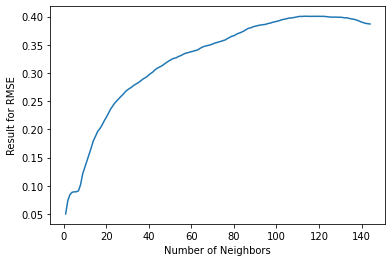

In [246]:
kn_plot(x_training, y_training_temp, X_test, Y_test_temp, n=145)

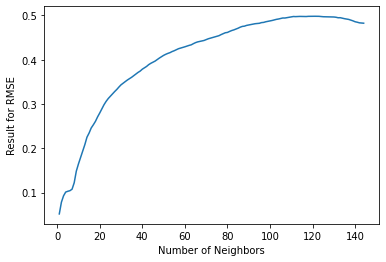

In [247]:
kn_plot(x_training, y_training_feelslike, X_test, Y_test_feelslike, n=145)

# Árvore de decisões

In [248]:
from itertools import product
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

lista_valores = list(range(5,50+1))
lista_valores.append(None)

for n_folhas, n_profundidade in product(lista_valores, lista_valores):
    modelo_dt = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_dt.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_dt.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f}."
    )

O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=5 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=6 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=7 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=8 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=9 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=10 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=11 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=12 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=13 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=14 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=15 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=16 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=17 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=18 foi de 3.8

In [249]:
from sklearn.tree import DecisionTreeRegressor

# cria o modelo
modelo_dt = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_dt.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)
print(previsao)

[[ 11.  11.]
 [ 12.  11.]
 [ 13.  12.]
 [ 27.  28.]
 [ 20.  20.]
 [ 24.  25.]
 [ 28.  27.]
 [ 17.  17.]
 [ 38.  38.]
 [ 28.  27.]
 [ 23.  23.]
 [  5.  -1.]
 [ 24.  23.]
 [ 19.  19.]
 [ 24.  26.]
 [ 25.  26.]
 [  4.  -1.]
 [ 21.  21.]
 [  5.   1.]
 [ 23.  23.]
 [-23. -36.]
 [ 22.  22.]
 [ 23.  25.]
 [ 38.  38.]
 [-23. -36.]
 [  4.  -1.]
 [ 21.  21.]
 [ 22.  22.]
 [-23. -36.]
 [ 22.  22.]
 [ 27.  25.]
 [ 27.  29.]
 [ 26.  28.]
 [ 31.  30.]
 [ 24.  23.]
 [ 22.  22.]
 [ 19.  19.]]


In [250]:
y_verdadeiro = y_teste
y_previsao = modelo_dt.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE}.")

O RMSE do modelo árvore de decisão foi de 1.8372051742268887.


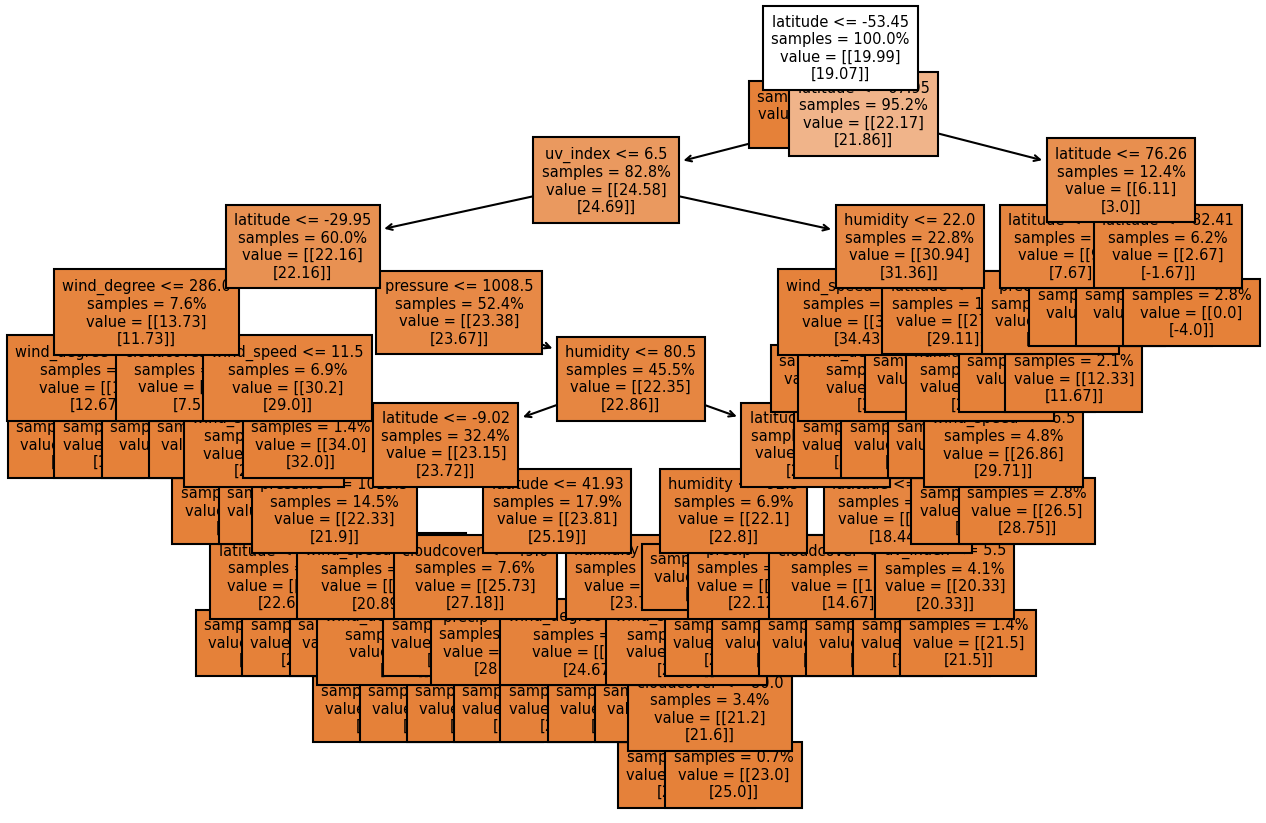

In [251]:
from sklearn import tree

# cria e treina o modelo
modelo_dt = DecisionTreeRegressor(
    max_leaf_nodes=40, # Melhor valor
    random_state=SEMENTE_ALEATORIA,
)
modelo_dt.fit(X_treino, y_treino)

# cria os objetos de figura e eixo
fig, axe = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(10, 7),
    dpi=150,
)

# plota o grafo da árvore de decisão
tree.plot_tree(
    modelo_dt,
    feature_names=FEATURES,
    ax=axe,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
    fontsize=7,
)

# mostra o plot para o usuário
plt.show()

In [252]:
from sklearn.tree import export_text

texto_dt = export_text(
    modelo_dt,
    feature_names=FEATURES,
    decimals=2,
)

print(texto_dt)

|--- latitude <= -53.45
|   |--- value: [-23.00, -36.00]
|--- latitude >  -53.45
|   |--- latitude <= 67.95
|   |   |--- uv_index <= 6.50
|   |   |   |--- latitude <= -29.95
|   |   |   |   |--- wind_degree <= 286.00
|   |   |   |   |   |--- wind_degree <= 238.50
|   |   |   |   |   |   |--- value: [17.00, 17.00]
|   |   |   |   |   |--- wind_degree >  238.50
|   |   |   |   |   |   |--- value: [14.25, 12.12]
|   |   |   |   |--- wind_degree >  286.00
|   |   |   |   |   |--- cloudcover <= 1.50
|   |   |   |   |   |   |--- value: [8.00, 5.00]
|   |   |   |   |   |--- cloudcover >  1.50
|   |   |   |   |   |   |--- value: [12.00, 10.00]
|   |   |   |--- latitude >  -29.95
|   |   |   |   |--- pressure <= 1008.50
|   |   |   |   |   |--- wind_speed <= 11.50
|   |   |   |   |   |   |--- wind_speed <= 4.50
|   |   |   |   |   |   |   |--- value: [30.20, 29.40]
|   |   |   |   |   |   |--- wind_speed >  4.50
|   |   |   |   |   |   |   |--- value: [27.67, 26.33]
|   |   |   |   |   |--- win

# Floresta aleatória.

In [253]:
seed = 97404
training_subset_size = 0.2

features = ['latitude', 'wind_speed', 'wind_degree', 'pressure', 'precip', 'humidity', 'cloudcover', 'uv_index', 'visibility']

feat_treino, feat_teste = train_test_split(df[features], test_size=training_subset_size, random_state=seed)
temp_treino, temp_teste = train_test_split(df["temperature"], test_size=training_subset_size, random_state=seed)
feel_treino, feel_teste = train_test_split(df["feelslike"], test_size=training_subset_size, random_state=seed)

In [254]:
feat_treino

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility
13,0.948905,0.54902,0.304469,0.991194,0.0,0.8,0.37,0.111111,1.0
156,-0.267247,0.27451,0.044693,0.994129,0.0,0.09,0.0,0.111111,1.0
153,-0.242524,0.254902,0.075419,0.995108,0.0,0.1,0.0,0.111111,1.0
223,-0.838239,0.588235,0.337989,0.980431,0.0,0.6,0.46,0.111111,1.0
41,0.710619,0.392157,0.418994,0.990215,0.022222,0.73,0.0,0.555556,1.0
...,...,...,...,...,...,...,...,...,...
105,0.166,0.254902,0.583799,0.988258,0.007407,0.76,0.51,0.666667,1.0
163,-0.32729,0.294118,0.863128,0.990215,0.0,0.14,0.0,0.111111,1.0
37,0.744643,0.352941,0.48324,0.990215,0.059259,0.89,0.73,0.444444,0.9
173,-0.412056,0.686275,0.756983,0.990215,0.0,0.75,0.1,0.111111,1.0


In [255]:
temp_treino

13     0.131579
156    0.552632
153         0.5
223   -0.605263
41     0.605263
         ...   
105    0.684211
163    0.605263
37          0.5
173    0.368421
135    0.736842
Name: temperature, Length: 145, dtype: Float64

In [256]:
feel_treino

13     0.026316
156    0.552632
153         0.5
223   -0.947368
41     0.657895
         ...   
105    0.736842
163    0.578947
37          0.5
173    0.315789
135    0.710526
Name: feelslike, Length: 145, dtype: Float64

In [257]:
feat_teste

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility
27,0.829762,0.098039,0.681564,0.98728,0.044444,1.0,1.0,0.333333,0.2
166,-0.35319,0.372549,0.787709,0.992172,0.0,0.19,0.0,0.111111,1.0
29,0.812809,0.078431,0.340782,0.986301,0.0,0.86,0.48,0.333333,1.0
49,0.642571,0.27451,0.382682,0.988258,0.0,0.48,0.22,0.777778,1.0
39,0.72769,0.215686,0.441341,0.992172,0.088889,0.85,0.76,0.444444,0.9
50,0.634095,0.215686,0.343575,0.989237,0.0,0.6,0.36,0.666667,1.0
136,-0.097834,0.176471,0.949721,0.986301,0.0,0.19,0.0,0.111111,1.0
172,-0.403814,0.078431,0.243017,0.990215,0.0,0.71,0.03,0.111111,1.0
99,0.216977,0.196078,0.469274,0.984344,0.0,0.13,0.07,1.0,1.0
137,-0.106428,0.176471,0.949721,0.986301,0.0,0.19,0.0,0.111111,1.0


In [258]:
temp_teste

27     0.289474
166    0.526316
29     0.263158
49     0.684211
39          0.5
50     0.631579
136    0.736842
172    0.342105
99          1.0
137    0.736842
144    0.605263
19     0.131579
139    0.657895
154         0.5
107    0.631579
47     0.631579
17     0.105263
38     0.526316
12     0.131579
146    0.605263
227   -0.605263
110    0.578947
120    0.578947
101         1.0
225   -0.605263
15     0.105263
114    0.552632
158    0.578947
224   -0.605263
34     0.552632
61     0.736842
103    0.710526
104    0.684211
127    0.789474
140    0.657895
45     0.578947
64     0.421053
Name: temperature, dtype: Float64

In [259]:
feel_teste

27     0.289474
166    0.526316
29     0.263158
49     0.684211
39          0.5
50     0.657895
136    0.684211
172    0.342105
99          1.0
137    0.684211
144    0.605263
19    -0.026316
139    0.631579
154         0.5
107    0.684211
47     0.684211
17    -0.026316
38     0.526316
12     0.026316
146    0.605263
227   -0.947368
110    0.657895
120    0.657895
101         1.0
225   -0.947368
15    -0.026316
114    0.552632
158    0.578947
224   -0.947368
34     0.552632
61     0.710526
103    0.763158
104    0.736842
127    0.789474
140    0.631579
45     0.657895
64     0.421053
Name: feelslike, dtype: Float64

In [260]:
from sklearn.ensemble import RandomForestRegressor as RFR

temp_treino = temp_treino.ravel()
temp_teste = temp_teste.ravel()

modelo_rf_temp = RFR(random_state=seed)
modelo_rf_feel = RFR(random_state=seed)

modelo_rf_temp.fit(feat_treino, temp_treino)
modelo_rf_feel.fit(feat_treino, feel_treino)

previsao_temp = modelo_rf_temp.predict(feat_teste)
previsao_feel = modelo_rf_feel.predict(feat_teste)
print(previsao_temp)
print(previsao_feel)

[ 0.28842105  0.35763158  0.32526316  0.71763158  0.52157895  0.62789474
  0.77052632  0.38657895  0.98315789  0.76973684  0.60473684  0.17289474
  0.64342105  0.52368421  0.58763158  0.59789474  0.12526316  0.56026316
  0.12342105  0.61210526 -0.60526316  0.57657895  0.60578947  0.98315789
 -0.60526316  0.12052632  0.55763158  0.57473684 -0.60526316  0.58842105
  0.72447368  0.68842105  0.66921053  0.75763158  0.63736842  0.56894737
  0.53026316]
[ 0.26868421  0.39552632  0.27236842  0.72447368  0.51026316  0.65473684
  0.70657895  0.35447368  0.98315789  0.7         0.60026316  0.06131579
  0.64736842  0.52394737  0.63026316  0.63052632  0.01026316  0.59105263
  0.01710526  0.605      -0.94736842  0.58684211  0.64184211  0.98315789
 -0.94736842  0.01        0.55894737  0.57710526 -0.94736842  0.62157895
  0.70947368  0.74026316  0.715       0.75368421  0.64578947  0.60973684
  0.56868421]


In [261]:
RMSE_temp = mean_squared_error(temp_teste, previsao_temp, squared=False)
RMSE_feel = mean_squared_error(feel_teste, previsao_feel, squared=False)

print(f'RMSE temperature: {RMSE_temp}\nRMSE Feelslike: {RMSE_feel}')

RMSE temperature: 0.041096991570902026
RMSE Feelslike: 0.04614429000956279


c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [262]:
def rf(leafs, depth, trees):
    from itertools import product

    RMSEs = []
    
    for l, d, t in product(leafs, depth, trees):
        modelo_rf_temp = RFR(n_estimators=t, max_leaf_nodes=l, max_depth=d, random_state=seed, n_jobs=4)
        modelo_rf_feel = RFR(n_estimators=t, max_leaf_nodes=l, max_depth=d, random_state=seed, n_jobs=4)

        modelo_rf_temp.fit(feat_treino, temp_treino)
        modelo_rf_feel.fit(feat_treino, feel_treino)
        
        p_temp = modelo_rf_temp.predict(feat_teste)
        p_feel = modelo_rf_feel.predict(feat_teste)
        
        RMSE_temp = mean_squared_error(temp_teste, p_temp, squared=False)
        RMSE_feel = mean_squared_error(feel_teste, p_feel, squared=False)
        
        RMSEs.append([l, d, t, RMSE_temp, RMSE_feel])
        
        #print(f'Leafs={l}\t\tDepth={d}\t\tTrees={t}\t\tRMSE temperature={RMSE_temp}\t\tRMSE feelslike={RMSE_feel}')
        
    return RMSEs

In [263]:
%%capture --no-display

folhas = [None, 6]
profundidade = [None, 3]
arvores = [10, 100, 300]

RMSEs = rf(folhas, profundidade, arvores)

In [264]:
RMSEs

[[None, None, 10, 0.038054133706621314, 0.045703308343067836],
 [None, None, 100, 0.04109699157090202, 0.0461442900095628],
 [None, None, 300, 0.042820555150928696, 0.04719890465748978],
 [None, 3, 10, 0.07532905629834696, 0.0951624251879802],
 [None, 3, 100, 0.0771267775764116, 0.0940250010357245],
 [None, 3, 300, 0.07714222323258199, 0.09422964671433406],
 [6, None, 10, 0.061924915118633975, 0.08653963395044485],
 [6, None, 100, 0.06149050717515305, 0.08242388013349199],
 [6, None, 300, 0.06214181535398773, 0.08192489705070825],
 [6, 3, 10, 0.07532905629834698, 0.0951624251879802],
 [6, 3, 100, 0.07710306796509457, 0.09404024033695951],
 [6, 3, 300, 0.07714900400055531, 0.09422519004835497]]

## Melhores modelos.

In [265]:
best_model_temp = RFR(n_estimators=10, random_state=seed, n_jobs=4)
best_model_feel = RFR(n_estimators=100, random_state=seed, n_jobs=4)

best_model_temp.fit(feat_treino, temp_treino)
best_model_feel.fit(feat_treino, feel_treino)

prev_temp = best_model_temp.predict(feat_teste)
prev_feel = best_model_feel.predict(feat_teste)

print(mean_squared_error(temp_teste, prev_temp, squared=False))
print(mean_squared_error(feel_teste, prev_feel, squared=False))

0.03805413370662132
0.0461442900095628


c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


## Hiperparâmetros.

In [266]:
subset_seed = 97404

In [267]:
folhas = [None]
for i in range(2, 100):
    folhas.append(i)

profundidade = [None]
for i in range(1, 100):
    profundidade.append(i)

arvores = [i for i in range(1, 100)]

In [268]:
%%capture --no-display

RMSEs_temp = []
RMSEs_feel = []
for i in folhas:
    model_temp = RFR(max_leaf_nodes=i, random_state=subset_seed, n_jobs=4)
    model_feel= RFR(max_leaf_nodes=i, random_state=subset_seed, n_jobs=4)
    
    model_temp.fit(feat_treino, temp_treino)
    model_feel.fit(feat_treino, feel_treino)
    
    prev_temp = model_temp.predict(feat_teste)
    prev_feel = model_feel.predict(feat_teste)
    
    RMSE_temp = mean_squared_error(temp_teste, prev_temp, squared=False)
    RMSE_feel = mean_squared_error(feel_teste, prev_feel, squared=False)
    
    RMSEs_temp.append(RMSE_temp)
    RMSEs_feel.append(RMSE_feel)

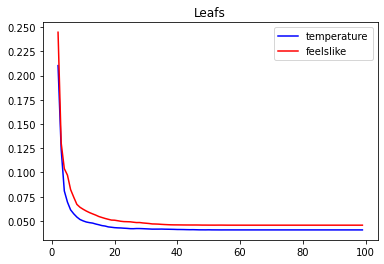

Leafs:
Temperature RMSE:0.04079623323975885, Index:53, Value:54
Feelslike RMSE:0.04568002985694745, Index:62, Value:63


In [269]:
fig, axe = plt.subplots()
axe.plot(folhas, RMSEs_temp, color='b', label='temperature')
axe.plot(folhas, RMSEs_feel, color='r', label='feelslike')
axe.legend(loc='upper right')
axe.title.set_text('Leafs')
plt.show()

index_temp = RMSEs_temp.index(min(RMSEs_temp))
index_feel = RMSEs_feel.index(min(RMSEs_feel))

print('Leafs:')
print(f'Temperature RMSE:{min(RMSEs_temp)}, Index:{index_temp}, Value:{folhas[index_temp]}')
print(f'Feelslike RMSE:{min(RMSEs_feel)}, Index:{index_feel}, Value:{folhas[index_feel]}')

In [270]:
%%capture --no-display

RMSEs_temp = []
RMSEs_feel = []
for i in profundidade:
    model_temp = RFR(max_depth=i, random_state=subset_seed, n_jobs=4)
    model_feel= RFR(max_depth=i, random_state=subset_seed, n_jobs=4)
    
    model_temp.fit(feat_treino, temp_treino)
    model_feel.fit(feat_treino, feel_treino)
    
    prev_temp = model_temp.predict(feat_teste)
    prev_feel = model_feel.predict(feat_teste)
    
    RMSE_temp = mean_squared_error(temp_teste, prev_temp, squared=False)
    RMSE_feel = mean_squared_error(feel_teste, prev_feel, squared=False)
    
    RMSEs_temp.append(RMSE_temp)
    RMSEs_feel.append(RMSE_feel)

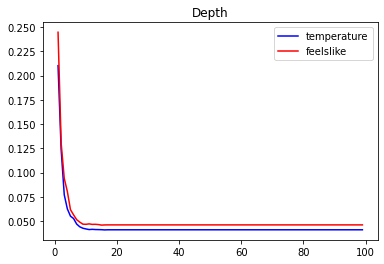

Depth:
Temperature RMSE:0.04096171704448887, Index:16, Value:17
Feelslike RMSE:0.045913982417718734, Index:15, Value:16


In [271]:
fig, axe = plt.subplots()
axe.plot(profundidade, RMSEs_temp, color='b', label='temperature')
axe.plot(profundidade, RMSEs_feel, color='r', label='feelslike')
axe.legend(loc='upper right')
axe.title.set_text('Depth')
plt.show()

index_temp = RMSEs_temp.index(min(RMSEs_temp))
index_feel = RMSEs_feel.index(min(RMSEs_feel))

print('Depth:')
print(f'Temperature RMSE:{min(RMSEs_temp)}, Index:{index_temp}, Value:{folhas[index_temp]}')
print(f'Feelslike RMSE:{min(RMSEs_feel)}, Index:{index_feel}, Value:{folhas[index_feel]}')

In [272]:
%%capture --no-display

RMSEs_temp = []
RMSEs_feel = []
for i in arvores:
    model_temp = RFR(n_estimators=i, random_state=subset_seed, n_jobs=4)
    model_feel= RFR(n_estimators=i, random_state=subset_seed, n_jobs=4)
    
    model_temp.fit(feat_treino, temp_treino)
    model_feel.fit(feat_treino, feel_treino)
    
    prev_temp = model_temp.predict(feat_teste)
    prev_feel = model_feel.predict(feat_teste)
    
    RMSE_temp = mean_squared_error(temp_teste, prev_temp, squared=False)
    RMSE_feel = mean_squared_error(feel_teste, prev_feel, squared=False)
    
    RMSEs_temp.append(RMSE_temp)
    RMSEs_feel.append(RMSE_feel)

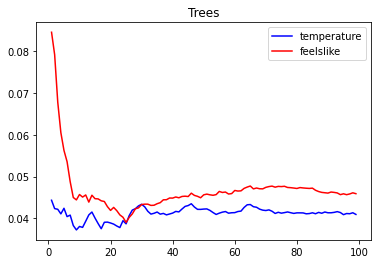

Trees:
Temperature RMSE:0.03722856210715129, Index:8, Value:9
Feelslike RMSE:0.03902533428849157, Index:24, Value:25


In [273]:
fig, axe = plt.subplots()
axe.plot(arvores, RMSEs_temp, color='b', label='temperature')
axe.plot(arvores, RMSEs_feel, color='r', label='feelslike')
axe.legend(loc='upper right')
axe.title.set_text('Trees')
plt.show()

index_temp = RMSEs_temp.index(min(RMSEs_temp))
index_feel = RMSEs_feel.index(min(RMSEs_feel))

print('Trees:')
print(f'Temperature RMSE:{min(RMSEs_temp)}, Index:{index_temp}, Value:{folhas[index_temp]}')
print(f'Feelslike RMSE:{min(RMSEs_feel)}, Index:{index_feel}, Value:{folhas[index_feel]}')

## Melhores modelos

In [274]:
best_model_temp = RFR(max_leaf_nodes=54, max_depth=16, n_estimators=9, random_state=subset_seed, n_jobs=4)
best_model_feel = RFR(max_leaf_nodes=None, max_depth=17, n_estimators=25, random_state=subset_seed, n_jobs=4)

best_model_temp.fit(feat_treino, temp_treino)
best_model_feel.fit(feat_treino, feel_treino)

prev_temp = best_model_temp.predict(feat_teste)
prev_feel = best_model_feel.predict(feat_teste)

print(mean_squared_error(temp_teste, prev_temp, squared=False))
print(mean_squared_error(feel_teste, prev_feel, squared=False))

0.041292557962880144
0.03902533428849157


c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


## Importância.

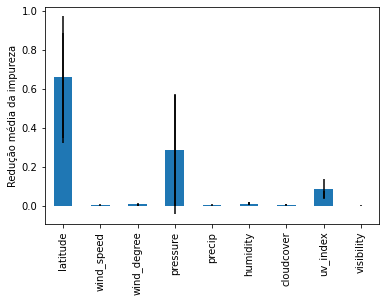

In [275]:
importancia_temp = best_model_temp.feature_importances_
importancia_feel = best_model_feel.feature_importances_

desvio_padrao_temp = np.std([arvore.feature_importances_ for arvore in best_model_temp.estimators_], axis=0)
desvio_padrao_feel = np.std([arvore.feature_importances_ for arvore in best_model_feel.estimators_], axis=0)

serie_importancia_temp = pd.Series(importancia_temp, index=features)
serie_importancia_feel = pd.Series(importancia_feel, index=features)

fig, axe = plt.subplots()

serie_importancia_temp.plot.bar(yerr=desvio_padrao_temp, ax=axe)
serie_importancia_feel.plot.bar(yerr=desvio_padrao_feel, ax=axe)

axe.set_ylabel("Redução média da impureza")
plt.show()

In [276]:
from sklearn.inspection import permutation_importance

N_REPETICOES = 10

def R2_1param(modelo, x, y):
    """Computa o coef. de determinação quando hip. alt. não tem coef. linear."""
    y_pred = modelo.predict(x).ravel()
    y_true = (np.array(y)).ravel()
    return 1 - sum((y_true - y_pred) ** 2) / sum(y_true**2)


X_local = feat_treino
y_local_temp = temp_treino
y_local_feel = feel_treino

R2_temp = R2_1param(best_model_temp, X_local, y_local_temp)
print(f"O R^2 da previsão temperature é de {R2_temp}\n")

r_temp = permutation_importance(
    best_model_temp,
    X_local,
    y_local_temp,
    n_repeats=N_REPETICOES,
    random_state=subset_seed,
    scoring=R2_1param,
)

for i in r_temp.importances_mean.argsort()[::-1]:
    if r_temp.importances_mean[i] - 2 * r_temp.importances_std[i] > 0:
        print(f"{features[i]:<8} "
              f"{r_temp.importances_mean[i]:.3f}"
              f" +/- {r_temp.importances_std[i]:.3f}")
        
print('\n\n\n')

R2_feel = R2_1param(best_model_feel, X_local, y_local_feel)
print(f"O R^2 da previsão feelslike é de {R2_feel}\n")

r_feel = permutation_importance(
    best_model_feel,
    X_local,
    y_local_feel,
    n_repeats=N_REPETICOES,
    random_state=subset_seed,
    scoring=R2_1param,
)

for i in r_feel.importances_mean.argsort()[::-1]:
    if r_feel.importances_mean[i] - 2 * r_feel.importances_std[i] > 0:
        print(f"{features[i]:<8} "
              f"{r_feel.importances_mean[i]:.3f}"
              f" +/- {r_feel.importances_std[i]:.3f}")

O R^2 da previsão temperature é de 0.999063780036528

latitude 0.270 +/- 0.018
pressure 0.076 +/- 0.007
uv_index 0.026 +/- 0.004
humidity 0.003 +/- 0.000
precip   0.001 +/- 0.000
wind_degree 0.001 +/- 0.000
cloudcover 0.001 +/- 0.000
wind_speed 0.000 +/- 0.000
visibility 0.000 +/- 0.000




O R^2 da previsão feelslike é de 0.9984666127064832

latitude 0.400 +/- 0.028
pressure 0.081 +/- 0.006
uv_index 0.031 +/- 0.004
humidity 0.004 +/- 0.001
wind_degree 0.001 +/- 0.000
precip   0.001 +/- 0.000
cloudcover 0.001 +/- 0.000
wind_speed 0.000 +/- 0.000
visibility 0.000 +/- 0.000


# Classificação

<AxesSubplot:>

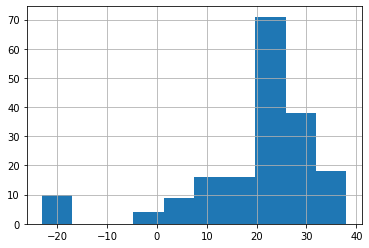

In [277]:
df_num["temperature"].hist(bins=10)

In [278]:
logic = df_num["temperature"] <= 5
print(len(df_num.loc[logic]),'Muito frio')
logic = (df_num["temperature"] > 5) & (df_num["temperature"] <= 16)
print(len(df_num.loc[logic]),'Frio')
logic = (df_num["temperature"] > 16) & (df_num["temperature"] <= 25)
print(len(df_num.loc[logic]),'Temperatura mediana')
logic = (df_num["temperature"] > 25) & (df_num["temperature"] <= 30)
print(len(df_num.loc[logic]),'Calor')
logic = (df_num["temperature"] > 30)
print(len(df_num.loc[logic]),'Muito calor')

23 Muito frio
26 Frio
77 Temperatura mediana
36 Calor
20 Muito calor


In [279]:
df_num['Temp Categórica'] = None

logic = df_num["temperature"] <= 5
df_num.loc[logic, 'Temp Categórica'] = 'Muito frio'
logic = (df_num["temperature"] > 5) & (df_num["temperature"] <= 16)
df_num.loc[logic, 'Temp Categórica'] = 'Frio'
logic = (df_num["temperature"] > 16) & (df_num["temperature"] <= 25)
df_num.loc[logic, 'Temp Categórica'] = 'Temperatura mediana'
logic = (df_num["temperature"] > 25) & (df_num["temperature"] <= 30)
df_num.loc[logic, 'Temp Categórica'] = 'Calor'
logic = (df_num["temperature"] > 30)
df_num.loc[logic, 'Temp Categórica'] = 'Muito Calor'
df_num

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility,temperature,feelslike,Temp Categórica
7,84.94,14,163,1022,0.0,80,5,1,10,0,-4,Muito frio
8,84.22,14,163,1022,0.0,80,5,1,10,0,-4,Muito frio
9,83.49,14,163,1022,0.0,80,5,1,10,0,-4,Muito frio
10,82.77,14,163,1022,0.0,80,5,1,10,0,-4,Muito frio
11,82.05,28,109,1013,0.0,80,37,1,10,5,1,Muito frio
...,...,...,...,...,...,...,...,...,...,...,...,...
224,-71.9,30,121,1002,0.0,60,46,1,10,-23,-36,Muito frio
225,-72.6,30,121,1002,0.0,60,46,1,10,-23,-36,Muito frio
226,-73.3,30,121,1002,0.0,60,46,1,10,-23,-36,Muito frio
227,-74.1,30,121,1002,0.0,60,46,1,10,-23,-36,Muito frio


In [280]:
test_size = 0.2
SEMENTE_ALEATORIA = seed
FEATURES = ["latitude", "wind_speed", "wind_degree", "pressure", "precip", "humidity", "cloudcover", "uv_index", "visibility"]
TARGET = ["Temp Categórica"]

indices = df_num.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=test_size, random_state=SEMENTE_ALEATORIA
)

df_treino = df_num.loc[indices_treino]
df_teste = df_num.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values
X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values

In [281]:
modelo_dt = DecisionTreeClassifier(random_state=seed)

modelo_dt.fit(X_treino, y_treino)

previsao = modelo_dt.predict(X_teste)
#print(previsao)

___

In [282]:
from sklearn import metrics

In [283]:
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))
print("Precisão (micro):",metrics.precision_score(y_teste, previsao, average='micro'))
print("Precisão (macro):",metrics.precision_score(y_teste, previsao, average='macro'))
print("Precisão (weighted):",metrics.precision_score(y_teste, previsao, average='weighted'))

Accuracy: 0.918918918918919
Precisão (micro): 0.918918918918919
Precisão (macro): 0.888888888888889
Precisão (weighted): 0.9474474474474475


___

In [284]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,10,12,14,16],
    'criterion' :['gini', 'entropy'],
    'max_leaf_nodes': [5,10,15,20,25,30,35,36,37,38,39,40,45,50]
}
CV_rfc = GridSearchCV(estimator=modelo_dt, param_grid=param_grid, cv= 5, n_jobs=8)
CV_rfc.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=97404),
             n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12, 14, 16],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 35, 36, 37,
                                            38, 39, 40, 45, 50]})

In [285]:
print(CV_rfc.best_params_)
best_params = CV_rfc.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': 25}


In [286]:
modelo_dt = DecisionTreeClassifier(random_state=seed)
modelo_dt.set_params(**best_params)

DecisionTreeClassifier(max_depth=10, max_features='auto', max_leaf_nodes=25,
                       random_state=97404)

In [287]:
modelo_dt.fit(X_treino, y_treino)
previsao = modelo_dt.predict(X_teste)
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))
print("Precisão (micro):",metrics.precision_score(y_teste, previsao, average='micro'))
print("Precisão (macro):",metrics.precision_score(y_teste, previsao, average='macro'))
print("Precisão (weighted):",metrics.precision_score(y_teste, previsao, average='weighted'))

Accuracy: 0.918918918918919
Precisão (micro): 0.918918918918919
Precisão (macro): 0.9492063492063492
Precisão (weighted): 0.921921921921922


In [288]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_teste, previsao)

array([[ 6,  0,  0,  0,  1],
       [ 0,  3,  0,  0,  1],
       [ 0,  0,  2,  0,  0],
       [ 0,  0,  0,  7,  0],
       [ 1,  0,  0,  0, 16]], dtype=int64)